# **Anomaly analyzer /ID33653**

Notebook presents how to convert RAW data received from object */ID33653*. The values ​​obtained from the resources with ID `2000` and `2001` should be assigned to variables `id33653_hex` and `anomaly_score`.

The code in the following cells will convert the RAW data into an array of floating point numbers and present the results in a chart. Meta information is needed for the proper interpretation of sensor data.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#CASE 1: Example with movement "Idle"
#Resource 2000
#anomaly_score = 3.4
#Resource 2001
#id33653_hex="000000004df766bfe7d70dc152291e3f037a69bf3f190fc108ac203f64b125bf985a10c108ac203f054f41bf3f190fc1a8fceb3e89968cbf90960cc1d3130a3f08ac20bf3f190fc108ac203fbc594bbf51a116c108ac203f3b6f5fbf90960cc15f07f63e150271bf1bc411c108ac203fcb8473bff09b11c119e7d73e17d748bff09b11c15f07f63e08ac20bf6b410fc11502f13e87c134bff09b11c1ada61b3fcb8473bf90960cc11502f13e150271bf740513c108ac203f17d748bf6b410fc1be2e233f17d748bfcc4614c151a1163f3f190fbf90960cc108ac203fbe2e23bfd02816c1ada61b3fbc594bbf90960cc1"

#CASE 2: Example with movement "Vertical"
#Resource 2000
#anomaly_score = 3.9952831268310542
#anomaly_score = 11.344868659973145
#Resource 2001
#id33653_hex="ce8b024096ecdcbfcf7e9fc16a18cabf08ac20bfa01e14c13f190f4063eda1bf12aca0c1ca8b823fbc594bbffe9504c1cb8473bf17d748bf2e918740be2e233f67ed21c012aca0c1f7aba0be89968cbfa17201c117d748bfbe2e23bf98a336403f190fbf17d7c8bf012499c111aca0bf89968cbf39468c401a34283f51a116c0735980c0cc0c7bbef7aba0be12aca0c117d7c8be7043f2bfac5666c0d3130abf55f7e6bf96b2b540f7aba03ef7aba0bebc5ba0c111aca03f85ecdcbe581e90c1f7aba03eaa0dc0bfc2c0efbf08ac20bff7ab203e12aca0c1ca8b823f51a116bf627d0bc1f7aba0be5ebbeabfba6a9f40"
#id33653_hex="bc954740772c03c0a69d29412b8a78409f1e94c07df8f640f12ddebf8da58bc012aca0c129e757bfdd0c7bc012aca0c1d4982c4014206fc087d28840630b2040077a69c0b61a6a4185ec5cbe2907abc012aca0c1a774e43f077a69c005069bc0a7746440dd0cfbbf1df37141d6e1d23fd2b6aac01f5226c17907f6bfed9b11c012aca0c1037a693fe48758c05f9b09c1677fee3f3b6f5fbf7bbe4f417e572bc0d2ff50c012aca0c172dccdbf486f5fc008a192c1780e05bf0cca1ec0ed02b64094788e40dd5c30c0d8982c4187c134bf08f79bc012aca0c196698fc067ed21c012aca0c1245f5040d0b62abfb8163241"

#DEMO
anomaly_score = 11
id33653_hex="1502f13f551565c0ada69b3f96ec5c3f89968cbec5055e414fcc3e3f5133e3c012aca0c1861b2f4041abdbc0581e90c19b1e143f8a8ffdbfbbedec4051a11640f62319bf82e53f41b3d1c33fc086c8c039307ec1abd1c33e4a17bac012aca0c12bf8ab3f66c134be379e3141f65f1540438d5dc017d7484064b1a53e227dcec012aca0c151a1163fc32ea3c012aca0c19885b83fd74f06c048dd92bfdb138a3fada69b3fcde3274185ecdc3ef12ddebf35648ac144fb1040f1f1e1beb38c55c1fc8abd3f1bbcaf3e5f9b09c14fccbe3f22c1b43d44fb10c1f7ab203ed4d648bdecb90fc11bbcaf3e51a116bf577419c1"


#Meta information
sensors = ["accX", "accY", "accZ"]
units = ["m/s2", "m/s2", "m/s2"]

frequency = 10

#Conversion process
Example on *Thingy:91* makes floating point arithmetics using `float32` type. These numbers are represented by 32 bits which equals 4 bytes of data. In the memory of the device they are stored in *little-endian* order. 


**Example:**

`float32 value = -0.902211`

`hex value = 0xbf66f74d`

`hex value in the memory = 4df766bf`



---


Anomaly analyzer (/ID3365) object provides the RAW sensor data as a byte array from the memory area where the sensor readings are stored. 

**Example:**

`id33653_hex="000000004df766bfe7d70dc1...`

`float32_tab = [0.000000,-0.902211,-8.865211,...`

---
RAW data represent a time series that comes from multiple sensors. Thanks to metadata, it is possible to interpret subsequent values. 

**Example:**

`sensors = ["accX", "accY", "accZ"]`

`ytab = {'accX': [0.0, ...], 'accY': [-0.902211, ...], 'accZ': [-8.865211, ...]}`




In [ ]:
print("INPUT:")
print(id33653_hex)

numbers = len(id33653_hex)//8
samples = numbers//len(sensors)

ytab={}

for sensor in sensors:
  ytab[sensor]=[]

s_index=0
for i in range(0,numbers):
  hex_num_str=""
  for j in range(8,0,-2):
    hex_num_str=hex_num_str + id33653_hex[i*8+j-2:i*8+j]

  value = int(hex_num_str, 16)

  np_int32 = np.int32(value)
  np_float32 = np_int32.view(np.float32)

  ytab[sensors[s_index]].append(np_float32)

  s_index = (s_index+1)%(len(sensors))

print("OUTPUT:")
print(ytab)

INPUT:
1502f13f551565c0ada69b3f96ec5c3f89968cbec5055e414fcc3e3f5133e3c012aca0c1861b2f4041abdbc0581e90c19b1e143f8a8ffdbfbbedec4051a11640f62319bf82e53f41b3d1c33fc086c8c039307ec1abd1c33e4a17bac012aca0c12bf8ab3f66c134be379e3141f65f1540438d5dc017d7484064b1a53e227dcec012aca0c151a1163fc32ea3c012aca0c19885b83fd74f06c048dd92bfdb138a3fada69b3fcde3274185ecdc3ef12ddebf35648ac144fb1040f1f1e1beb38c55c1fc8abd3f1bbcaf3e5f9b09c14fccbe3f22c1b43d44fb10c1f7ab203ed4d648bdecb90fc11bbcaf3e51a116bf577419c1
OUTPUT:
{'accX': [1.882876, 0.862985, 0.745305, 2.736055, 0.578592, 2.353596, 1.529837, 0.382459, 1.343511, 2.333982, 0.323619, 0.588399, 1.441577, 1.078731, 0.431492, 2.265336, 1.480804, 1.49061, 0.156906, 0.343232], 'accY': [-3.579427, -0.274586, -7.100014, -6.864655, -1.980943, -0.598205, -6.266449, -5.815343, -0.176519, -3.461747, -6.452775, -5.099458, -2.098623, 1.216024, -1.735777, -0.441299, 0.343232, 0.088259, -0.049033, -0.588399], 'accZ': [1.216024, 13.876409, -20.084019, -18.014816, 7.40402, 11.9

#Data visualization

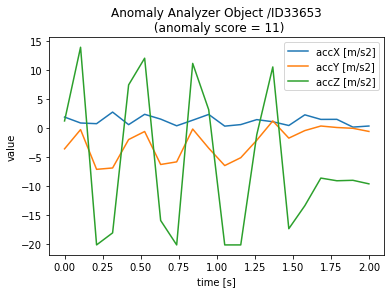

In [ ]:
x = np.linspace(0,samples//frequency, num=samples)

plt.xlabel("time [s]")
plt.ylabel("value")

for sensor in zip(sensors, units):
  plt.plot(x,ytab[sensor[0]], label="{} [{}]".format(sensor[0],sensor[1]))

plt.title("Anomaly Analyzer Object /ID33653\n (anomaly score = {})".format(anomaly_score))
plt.legend()
plt.show()